<a href="https://colab.research.google.com/github/barbosa-loha/Estatistica/blob/main/Netflix_ViewingActivity_Lissandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O arquivo a seguir corresponde ao arquivo ViewingActivity da usuária Lissandra, no período de 23 de janeiro de 2023 ao período de 14 de maio de 2023, no qual a Netfliz disponibiliza caso os usuários o peçam. A solicitação é feita imediatamente, no entanto, o envio dos dados está previsto para até 30 dias corridos.

Carregando bilbiotecas e o banco de dados:

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)
from collections import Counter
import plotly.express as px

In [33]:
arquivo1 = '/content/ViewingActivity.csv'
dados1 = pd.read_csv(arquivo1)
dados1

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Lissandra,2023-05-14 20:44:54,00:36:00,NaN,Respire!: Minissérie: Você está em casa (Episó...,NaN,Amazon Fire TV Stick 2020 + Streaming Stick,00:36:05,00:36:05,BR (Brazil)
1,Lissandra,2023-05-14 20:27:43,00:17:05,Autoplayed: user action: User_Interaction;,Respire!: Minissérie: Realidade e sonhos (Epis...,NaN,Amazon Fire TV Stick 2020 + Streaming Stick,00:29:22,00:29:22,BR (Brazil)
2,Lissandra,2023-05-14 19:39:36,00:12:13,NaN,Respire!: Minissérie: Realidade e sonhos (Epis...,NaN,Amazon Fire TV Stick 2020 + Streaming Stick,00:12:18,Not latest view,BR (Brazil)
3,Lissandra,2023-05-14 19:08:59,00:30:34,NaN,Respire!: Minissérie: Partidas (Episódio 4),NaN,Amazon Fire TV Stick 2020 + Streaming Stick,00:30:39,00:30:39,BR (Brazil)
4,Lissandra,2023-05-14 18:29:54,00:38:04,Autoplayed: user action: User_Interaction;,Respire!: Minissérie: Hierarquia de necessidad...,NaN,Amazon Fire TV Stick 2020 + Streaming Stick,00:38:05,00:38:05,BR (Brazil)
...,...,...,...,...,...,...,...,...,...,...
696,Lissandra,2023-01-24 01:00:55,00:21:09,NaN,Bee e o Gatiorrinho: Parte 1: Quem iria querer...,NaN,Chrome PC (Cadmium),00:23:35,00:23:35,BR (Brazil)
697,Lissandra,2023-01-23 22:40:32,00:02:26,NaN,Bee e o Gatiorrinho: Parte 1: Quem iria querer...,NaN,Chrome PC (Cadmium),00:02:26,Not latest view,BR (Brazil)
698,Lissandra,2023-01-23 22:13:15,00:25:10,NaN,Bee e o Gatiorrinho: Parte 1: O que você quer ...,NaN,Chrome PC (Cadmium),00:25:02,Not latest view,BR (Brazil)
699,Lissandra,2023-01-23 22:12:48,00:00:03,NaN,Belle,NaN,Chrome PC (Cadmium),00:00:03,00:00:03,BR (Brazil)


Verfifica valores únicos em cada variável:

In [6]:
dados1.nunique() #Verificar valores exclusivos

Profile Name                 1
Start Time                 701
Duration                   371
Attributes                   2
Title                      490
Supplemental Video Type      5
Device Type                  3
Bookmark                   358
Latest Bookmark            234
Country                      1
dtype: int64

Retirando as variáveis que não vamos usar e criando uma nova coluna a partir de titulos, na qual está mais limpo do na original:

In [7]:
dados1 = dados1.drop(["Profile Name", 'Attributes', 'Supplemental Video Type',
             'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
trailer = dados1[dados1["Title"].str.contains("(Trailer)")]

<ipython-input-7-559ab0c271c6>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  trailer = dados1[dados1["Title"].str.contains("(Trailer)")]


In [8]:
dados1['Title_clean'] = dados1['Title'].str.split('_').str[0]
dados1['Title_clean'] = dados1['Title_clean'].str.split(':').str[0]

In [9]:
dados1.head()

,Start Time,Duration,Title,Title_clean
0,2023-05-14 20:44:54,00:36:00,Respire!: Minissérie: Você está em casa (Episó...,Respire!
1,2023-05-14 20:27:43,00:17:05,Respire!: Minissérie: Realidade e sonhos (Epis...,Respire!
2,2023-05-14 19:39:36,00:12:13,Respire!: Minissérie: Realidade e sonhos (Epis...,Respire!
3,2023-05-14 19:08:59,00:30:34,Respire!: Minissérie: Partidas (Episódio 4),Respire!
4,2023-05-14 18:29:54,00:38:04,Respire!: Minissérie: Hierarquia de necessidad...,Respire!


Corrigindo o formato de data e hora em formatos de "data e hora":

In [10]:
dados1['Duration'] = pd.to_timedelta(dados1['Duration'])
dados1['Start Time'] = pd.to_datetime(dados1['Start Time'])

# Algumas das descobertas 🙇

*   Qual filme a Lissandra mais assistiu em uma única sessão e por quanto tempo assistiu?

In [11]:
def longestSession():
    print('Sessão mais longa:',dados1["Duration"].max())
    longsess = dados1["Duration"].max()
    # find index of longest duration according to excel sheet
    longsess_idx = dados1.index[dados1["Duration"] == longsess][0] #get first match of longest duration index
    # get entire row using the index    
    longsess = dados1.iloc[[longsess_idx]] #takes in a list and returns all the data in that row
    print("Lizzie, você assistiu", longsess["Title"].values[0], "por", longsess["Duration"].values[0])
longestSession()

Sessão mais longa: 0 days 01:43:47
Lizzie, você assistiu Persuasão por 6227000000000 nanoseconds


Nesse caso, Lissandra assistiu "Persuasão", em uma hora e quarenta e três minutos em uma única sessão.

Como o banco de dados carece de variáveis, pode-se realizar algumas análises exploratórias.
  
*   Tempo total gasto assistindo a um filme específico:

In [12]:
def totalTimeSpent(movie):
    moviename = dados1[dados1['Title_clean'].str.contains(movie, regex=False)]
    print("tempo gasto assistindo",movie,moviename["Duration"].sum())

totalTimeSpent('Emily em Paris')
totalTimeSpent('Breaking Bad')
totalTimeSpent('Respire!')
totalTimeSpent('Persuasão')


tempo gasto assistindo Emily em Paris 0 days 13:59:21
tempo gasto assistindo Breaking Bad 0 days 08:10:52
tempo gasto assistindo Respire! 0 days 03:16:18
tempo gasto assistindo Persuasão 0 days 01:43:47


*   Duração total que assistiu à Netflix pelo dias da semana:

[30.678611111111113, 15.141944444444444, 7.729166666666667, 21.149722222222223, 7.729166666666667, 10.62638888888889, 39.287777777777784]


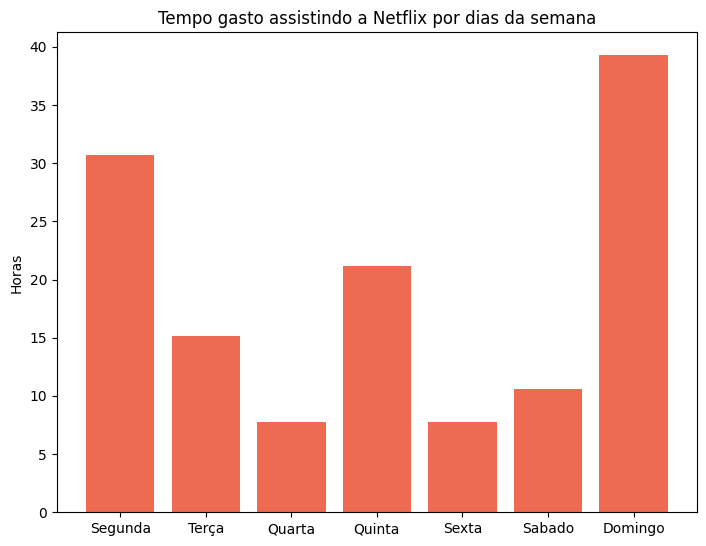

In [16]:
pd.options.mode.chained_assignment = None  # default='warn' use this to remove warnings

dados1['weekday'] = dados1['Start Time'].dt.weekday #returns 0 to 6
dados1['hour'] = dados1['Start Time'].dt.hour # return the hour of the day from 0 23

# print(dados1['hour'])

monday = dados1[dados1['weekday']==0]['Duration'].sum()
tuesday = dados1[dados1['weekday']==1]['Duration'].sum()
wednesday = dados1[dados1['weekday']==2]['Duration'].sum()
thursday = wednesday = dados1[dados1['weekday']==3]['Duration'].sum()
friday = wednesday = dados1[dados1['weekday']==4]['Duration'].sum()
saturday = dados1[dados1['weekday']==5]['Duration'].sum()
sunday = dados1[dados1['weekday']==6]['Duration'].sum()

dayList = [monday,tuesday,wednesday,thursday,friday,saturday,sunday]
for i in range(len(dayList)):
    dayList[i] = dayList[i].total_seconds()/60/60
print(dayList)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = ['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo']
ax.bar(days,dayList, color=['#EE6A50', '#EE6A50', '#EE6A50', '#EE6A50', '#EE6A50','#EE6A50'])
plt.ylabel("Horas")
plt.title("Tempo gasto assistindo a Netflix por dias da semana")
plt.show()

*   Os vinte títulos mais assistidos:

In [17]:
movie_views = dados1.groupby(['Title_clean'])['Duration'].sum().sort_values(ascending = False)
print(movie_views.head(20))

Title_clean
Naruto                        0 days 22:46:17
Tudo Bem Não Ser Normal       0 days 16:11:18
Emily em Paris                0 days 13:59:21
Uma Advogada Extraordinária   0 days 13:52:58
Sempre Bruxa                  0 days 10:56:44
Breaking Bad                  0 days 08:10:52
Fadas da Limpeza              0 days 07:44:10
O Agente Noturno              0 days 07:25:30
Treta                         0 days 05:27:56
As Telefonistas               0 days 03:26:12
Jane The Virgin               0 days 03:19:53
Respire!                      0 days 03:16:18
Bee e o Gatiorrinho           0 days 02:19:58
Na Direção do Amor            0 days 02:15:54
Persuasão                     0 days 01:43:47
O Mínimo para Viver           0 days 01:43:13
Ofélia                        0 days 01:40:15
Royalteen                     0 days 01:36:01
Fim do Mundo                  0 days 01:32:52
O Poço                        0 days 01:29:56
Name: Duration, dtype: timedelta64[ns]


*   Ultimos títulos vistos

In [18]:
movie_views.tail(10)

Title_clean
The Last Forest -  Upper Bound Clip 1              0 days 00:00:04
A Verdadeira História do Roubo do Século (Clipe)   0 days 00:00:04
Chickenhare and the Hamster of Darkness - CLM 11   0 days 00:00:04
Temporada 3 (Trailer)                              0 days 00:00:04
Temporada 4 (Teaser 3)                             0 days 00:00:04
Belle                                              0 days 00:00:03
As Leis de Lidia Poët                              0 days 00:00:02
The Midnight Gospel                                0 days 00:00:02
A Mãe                                              0 days 00:00:01
The Walking Dead                                   0 days 00:00:01
Name: Duration, dtype: timedelta64[ns]

In [50]:
fig2 = px.pie(dados1, names='Device Type', 
             height=400, width=600, 
             hole=0.7, 
             title='Por qual meio assistiu',
                   color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2